In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
from scipy.stats import norm

/home/rafael/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
def d1(S,K,r,stdev,T):
    return (np.log(S/K)+(r+stdev**2/2)*T)/(stdev*np.sqrt(T))

def d2(S,K,r,stdev,T):
    return (np.log(S/K)+(r-stdev**2/2)*T)/(stdev*np.sqrt(T))

In [3]:
def BSM(S,K,r,stdev,T):
    return (S*norm.cdf(d1(S,K,r,stdev,T)))-(K*np.exp(-r*T)*norm.cdf(d2(S,K,r,stdev,T)))

In [4]:
data=pd.read_csv("PG_2007_2017.csv",index_col="Date")

In [5]:
S=data.iloc[-1]

In [6]:
log_returns=np.log(1+data.pct_change())

In [7]:
stdev=log_returns.std() *250 **0.5 #One year

## Lets make r=2.5% , K= 110 , T=1

In [8]:
r=0.025
K=110
T=1

In [9]:
BSM(S,K,r,stdev,T)

PG    1.132067
Name: 2017-04-10, dtype: float64

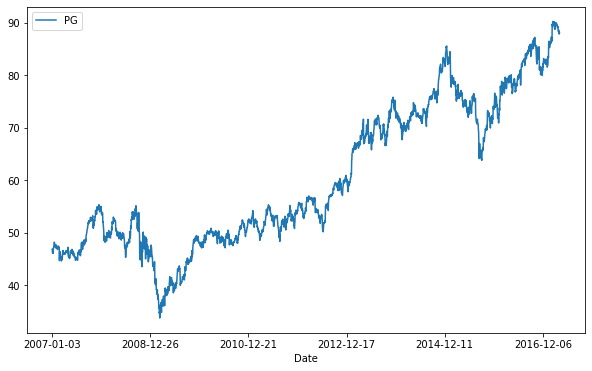

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
data.plot(figsize=(10,6))

In [11]:
t_intervals=250
delta_t=1/t_intervals #1 year divided by the 250 trading days
iterations=20000

In [12]:
Z=np.random.standard_normal((t_intervals+1,iterations))
S=np.zeros_like(Z)

In [13]:
S[0]=data.iloc[-1]
stdev=stdev.values

In [14]:
for t in range(1,t_intervals+1):
    S[t]=S[t-1]*np.exp((r-0.5*stdev**2)*delta_t+stdev*delta_t**0.5*Z[t])

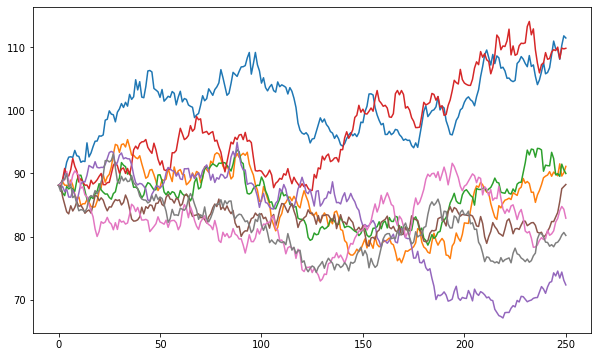

In [15]:
plt.figure(figsize=(10,6))
plt.plot(S[:,:8])

In [16]:
payoff=np.maximum(S[-1]-K,0)
payoff

array([ 1.4618084 ,  0.        ,  0.        , ...,  0.        ,
       10.47128254,  0.        ])

In [17]:
C=np.exp(-r*T)*np.sum(payoff)/iterations
C

1.1239800772253623